<a href="https://colab.research.google.com/github/MahvashJebeli/Deep_Learning/blob/main/Deep%20Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Deep Learning, Neural Network
# This code is my practice from the online course on https://www.youtube.com/playlist?list=PLQVvvaa0QuDfhTox0AjmQ6tvTgMBZBEXN
import tensorflow as tf
# tf.config.set_visible_devices([], 'GPU')
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Activation
# print("TensorFlow version:", tf.__version__)
import matplotlib.pyplot as plt
import numpy as np

11490434/11490434 [==============================] - 0s 0us/step


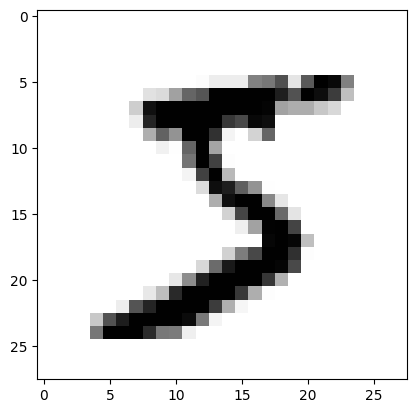

In [2]:
# Loading data
mnist = tf.keras.datasets.mnist # 28x28 images of hand-written digits 0-9
# Dividing in train and test datasets
(x_train, y_train), (x_test, y_test) = mnist.load_data()
plt.imshow(x_train[0], cmap = plt.cm.binary)
# Normalization
x_train = tf.keras.utils.normalize(x_train, axis = 1)
x_test = tf.keras.utils.normalize(x_test, axis = 1)

In [3]:
# Building the model
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten())
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) # rectified linear
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) # osftmax as it is a probability distribution

# Parameters for training the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics = ['accuracy'])
# Fitting the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2661 - accuracy: 0.9212
Epoch 2/3
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1079 - accuracy: 0.9666
Epoch 3/3
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0746 - accuracy: 0.9766


In [4]:
# Evaluating the model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 [==============================] - 1s 1ms/step - loss: 0.0908 - accuracy: 0.9717
0.0907597690820694 0.9717000126838684


In [5]:
# Saving the model and reuse it
model.save('num_reader.model')
reloaded_model = tf.keras.models.load_model('num_reader.model')

313/313 [==============================] - 0s 1ms/step
7


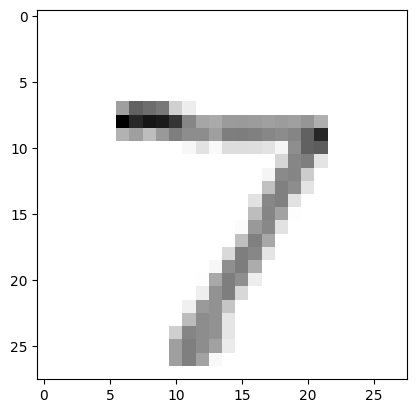

In [6]:
# Making predictions
prediction = reloaded_model.predict([x_test])
print(np.argmax(prediction[0]))
plt.imshow(x_test[0], cmap = plt.cm.binary)
plt.show()